In [2]:
from FVG import FVGStrategy
from helpers import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tqdm

import warnings
warnings.filterwarnings("ignore")



import_search = True

# Run Initial

In [3]:
df = pd.read_csv('/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/Data/BTC.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True)

rf = df['Risk Free Rate']
btc = df.drop(columns=['Risk Free Rate'])

params = [10, 2, 30, 5]
# strategy = FVGStrategy(lookback_period=10, body_multiplier=1.2, backcandles=50, test_candles=15)
strategy = FVGStrategy(*params)
signals_df = strategy.generate_signals(btc)



signals_df['Risk Free Rate'] = (1 + rf) ** (1/365) - 1
signals_df.head()



Detecting Break Signals: 100%|██████████| 3561/3561 [00:00<00:00, 109320.52it/s]

Signal Generation Complete


,Date,Close,Signal,Risk Free Rate
0,2015-07-20,280.00,0,0.000064
1,2015-07-21,277.32,0,0.000063
2,2015-07-22,277.89,0,0.000063
3,2015-07-23,277.39,0,0.000062
4,2015-07-24,289.12,0,0.000062


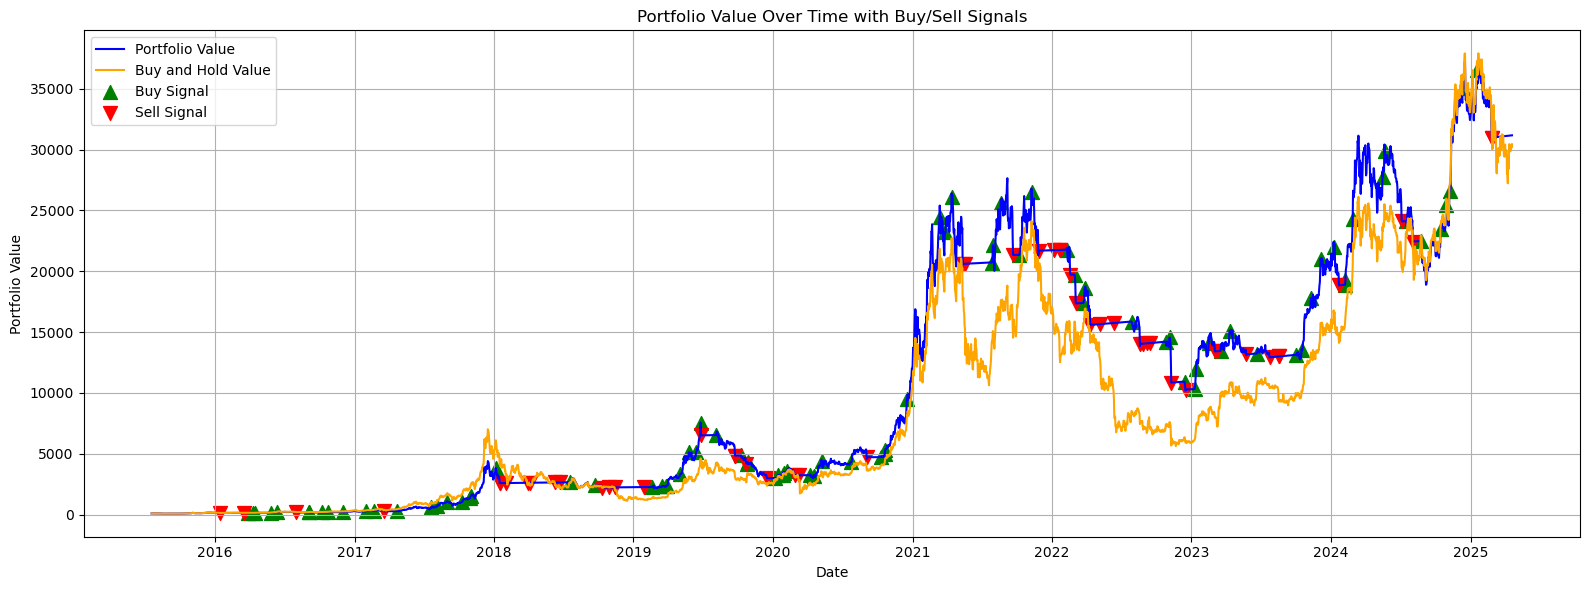

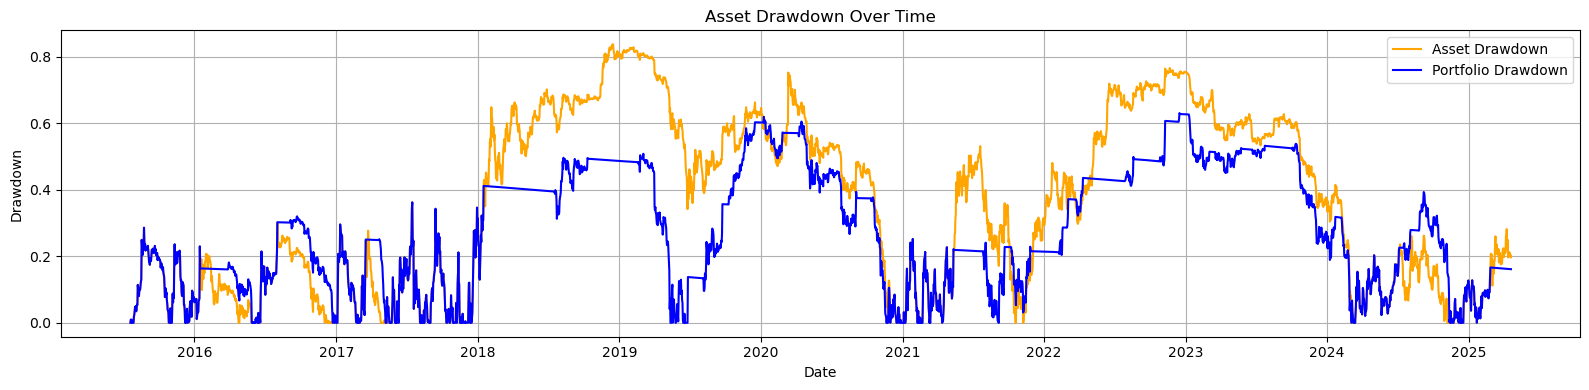

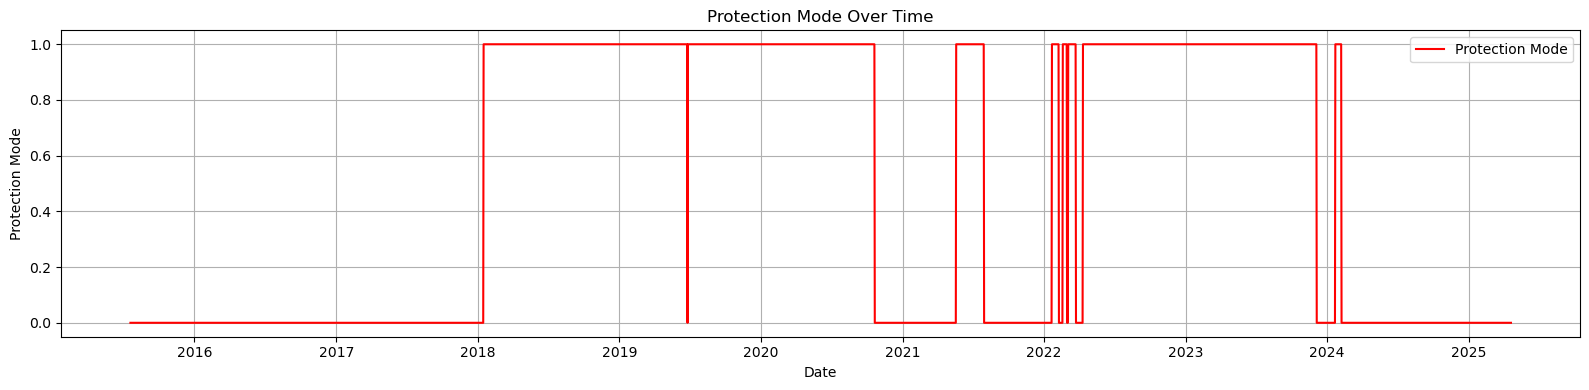

REPORT
--------------------------------
Date Range: 2015-07-20 00:00:00 - 2025-04-19 00:00:00
--------------------------------
Strategy Total Return: 80.20%
Buy and Hold Total Return: 79.76%
Strategy Improvement (%) : 0.55%
--------------------------------
Strategy Sharpe Ratio: 0.07
Buy and Hold Sharpe Ratio: 0.06
Strategy Improvement (%) : 13.43%
--------------------------------
Strategy Max Drawdown: 63.10%
Buy and Hold Max Drawdown: 83.80%
Strategy Improvement (%) : -24.70%
--------------------------------
# Buy Signals: 86
# Sell Signals: 53
# Hold Signals: 3423
--------------------------------
Average Gap : 1885.25 (19.33%)
Standard Deviation of Gap : 2560.79 (35.19%)


In [5]:
result = simmulate(signals_df, 
                   initial_cash=0, btc_value=100, 
                   long_position=1, short_position=0, transaction_fee=0.001, 
                   max_drawdown_threshold=0.4, drawdown_buffer=0.05)

# plot results
plot_portfolio_with_signals(result)
plot_drawdown(result)
plot_protection_mode(result)

# generate report
report = generate_report(result, verbose=True)

# Grid Search (Bitcoin)

In [6]:
df = pd.read_csv('/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/Data/BTC.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True)

rf = df['Risk Free Rate']
df = df.drop(columns=['Risk Free Rate'])

# grid search
if not import_search:
    params = grid_search(df, rf, save='/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/FVG_Grid_Search/btc_results.csv')
else:
    params = pd.read_csv('/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/FVG_Grid_Search/btc_results.csv').sort_values(by='Strategy Sharpe Ratio', ascending=False).iloc[0, :4]



## Optimal Bitcoin

Detecting Break Signals: 100%|██████████| 3561/3561 [00:00<00:00, 132431.74it/s]


Signal Generation Complete


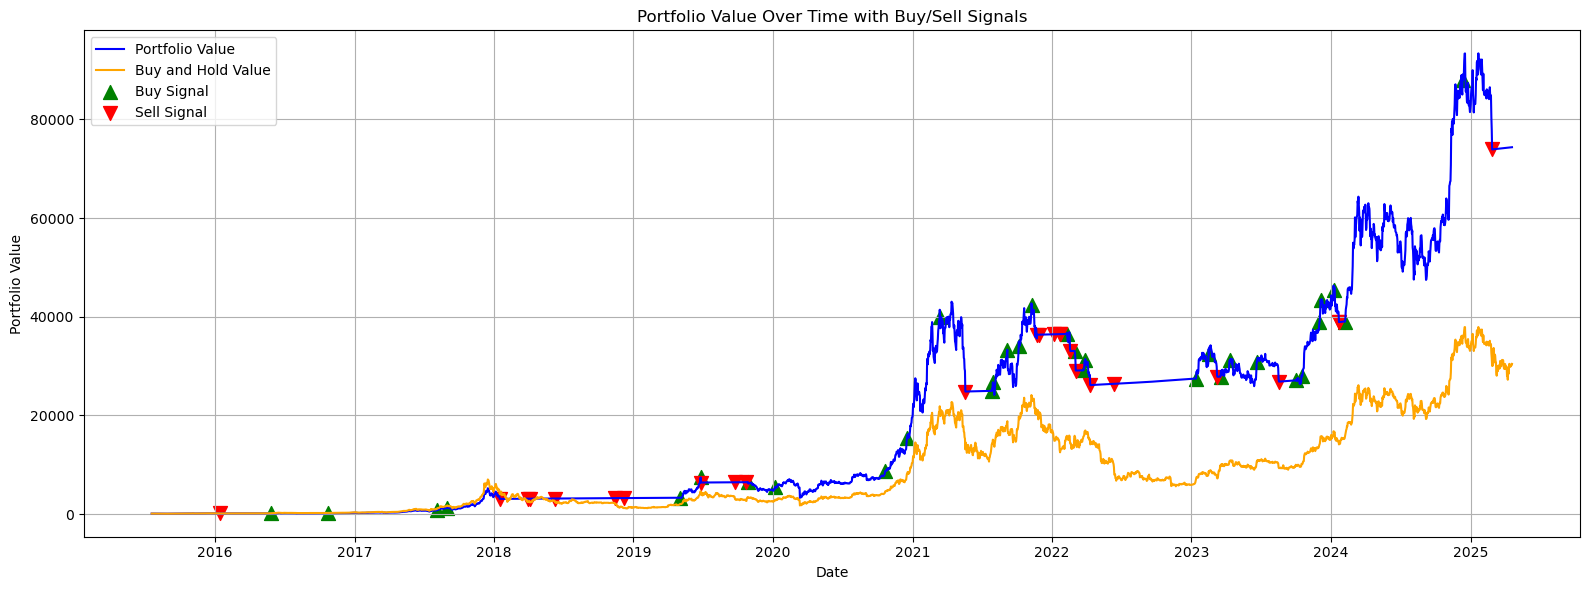

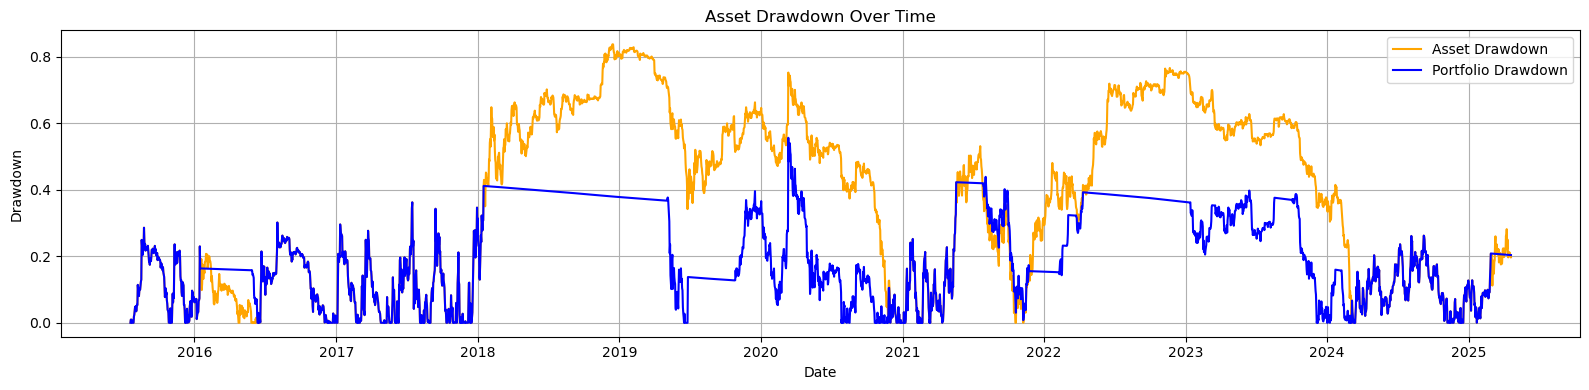

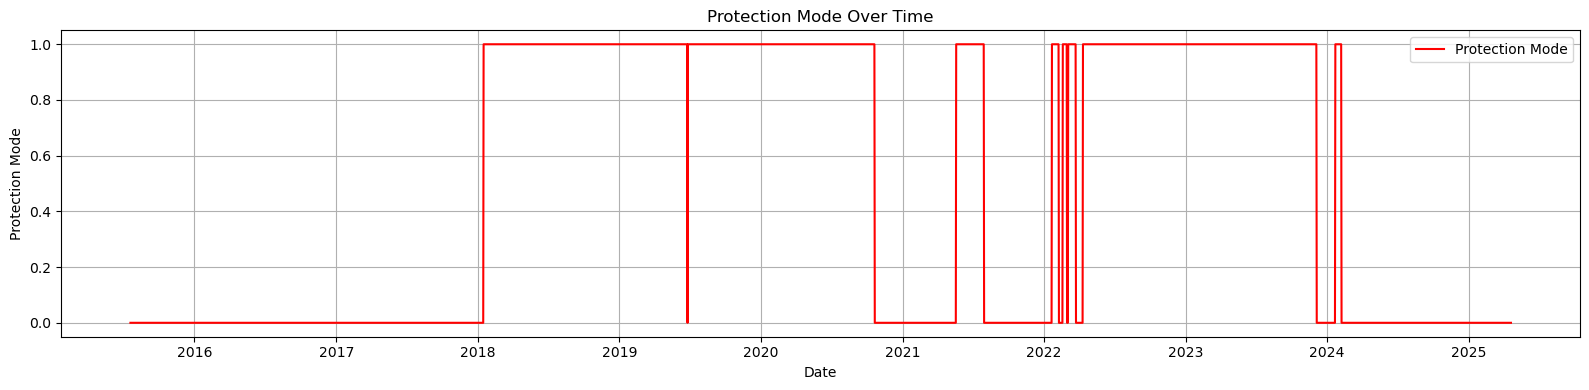

REPORT
--------------------------------
Date Range: 2015-07-20 00:00:00 - 2025-04-19 00:00:00
--------------------------------
Strategy Total Return: 96.96%
Buy and Hold Total Return: 79.76%
Strategy Improvement (%) : 21.56%
--------------------------------
Strategy Sharpe Ratio: 0.08
Buy and Hold Sharpe Ratio: 0.06
Strategy Improvement (%) : 25.40%
--------------------------------
Strategy Max Drawdown: 55.66%
Buy and Hold Max Drawdown: 83.80%
Strategy Improvement (%) : -33.58%
--------------------------------
# Buy Signals: 32
# Sell Signals: 25
# Hold Signals: 3505
--------------------------------
Average Gap : 11177.81 (89.78%)
Standard Deviation of Gap : 13466.52 (90.06%)


In [7]:
# params in params

strategy = FVGStrategy(*params)
signals_df = strategy.generate_signals(df)


signals_df['Risk Free Rate'] = (1 + rf) ** (1/365) - 1

result = simmulate(signals_df, 
                   initial_cash=0, btc_value=100, 
                   long_position=1, short_position=0, transaction_fee=0.001, 
                   max_drawdown_threshold=0.4, drawdown_buffer=0.05)

# plot results
plot_portfolio_with_signals(result)
plot_drawdown(result)
plot_protection_mode(result)

# generate report
report = generate_report(result, verbose=True)

# Get Params from train sets (Bitcoin)

In [8]:

data = pd.read_csv('/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/Data/BTC.csv')
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
# get a list of each jan first that exists in data['Date']
dates = data[(data['Date'].dt.month == 1) & (data['Date'].dt.day == 1)]['Date'].tolist()

for i in range(1, len(dates)):
    year = dates[i]
    prev_year = dates[i-1]
    df = data[(data['Date'] < year) & (data['Date'] >= prev_year)]
    df.reset_index(drop=True, inplace=True)

    rf = df['Risk Free Rate']
    df = df.drop(columns=['Risk Free Rate'])

    # grid search
    # params = grid_search(df, rf, save=f'/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/FVG_Grid_Search/btc_train_results_{prev_year.year}-{year.year}')

# Test Set (Bitcoin)

## Reports

Detecting Break Signals: 100%|██████████| 364/364 [00:00<00:00, 105963.82it/s]


Signal Generation Complete


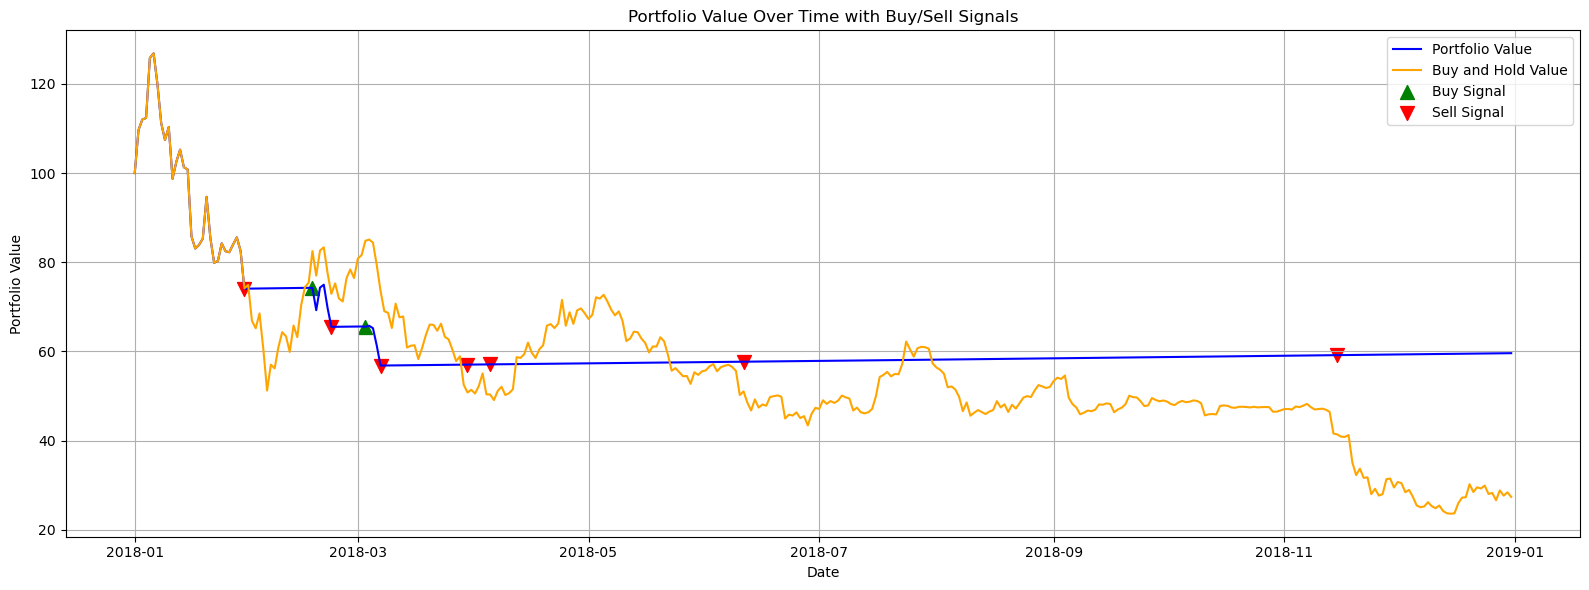

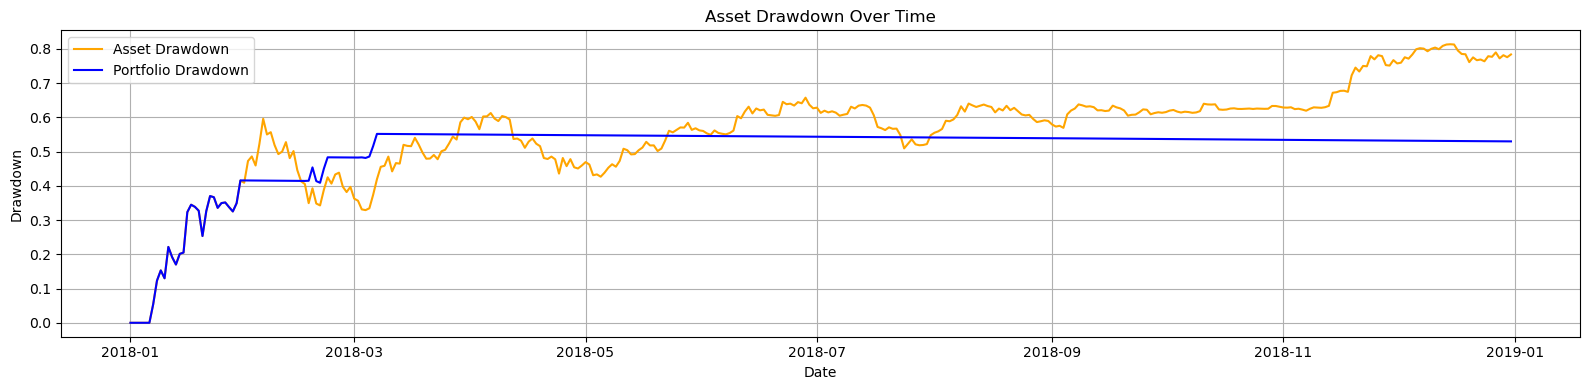

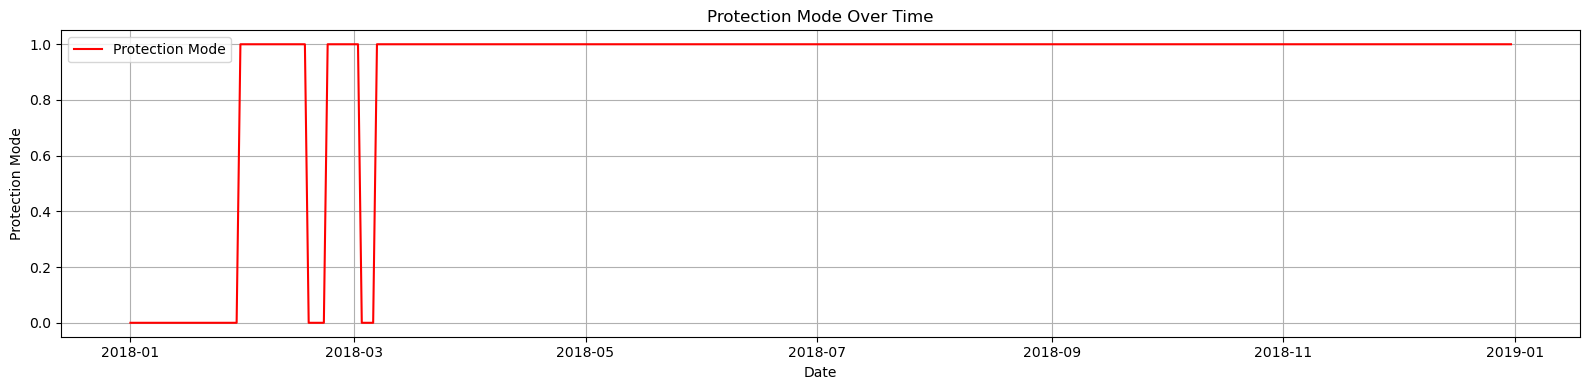

REPORT
--------------------------------
Date Range: 2018-01-01 00:00:00 - 2018-12-31 00:00:00
--------------------------------
Strategy Total Return: 59.81%
Buy and Hold Total Return: 27.47%
Strategy Improvement (%) : 117.73%
--------------------------------
Strategy Sharpe Ratio: -0.07
Buy and Hold Sharpe Ratio: -0.06
Strategy Improvement (%) : 7.06%
--------------------------------
Strategy Max Drawdown: 55.19%
Buy and Hold Max Drawdown: 81.38%
Strategy Improvement (%) : -32.18%
--------------------------------
# Buy Signals: 2
# Sell Signals: 7
# Hold Signals: 356
--------------------------------
Average Gap : 6.76 (20.84%)
Standard Deviation of Gap : 12.08 (37.35%)







Detecting Break Signals: 100%|██████████| 364/364 [00:00<00:00, 119856.07it/s]


Signal Generation Complete


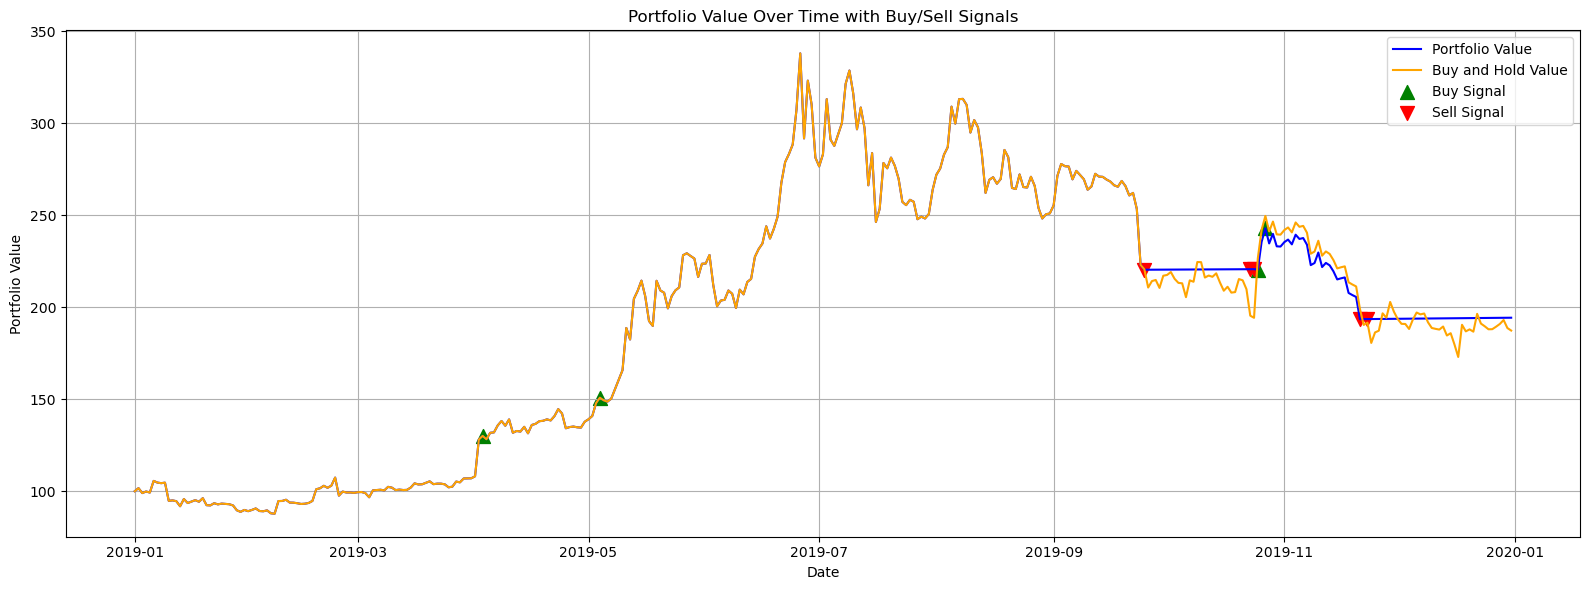

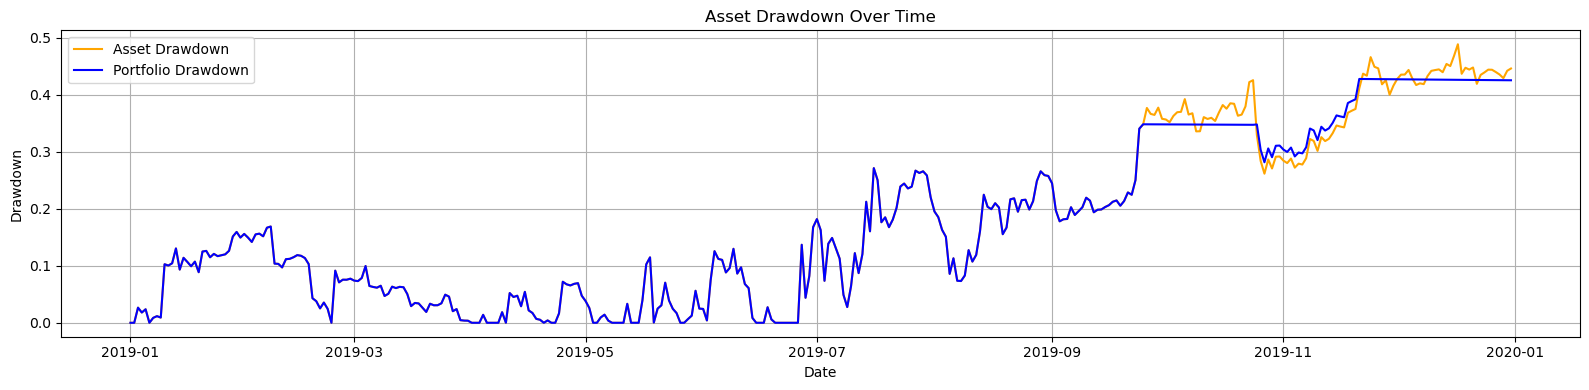

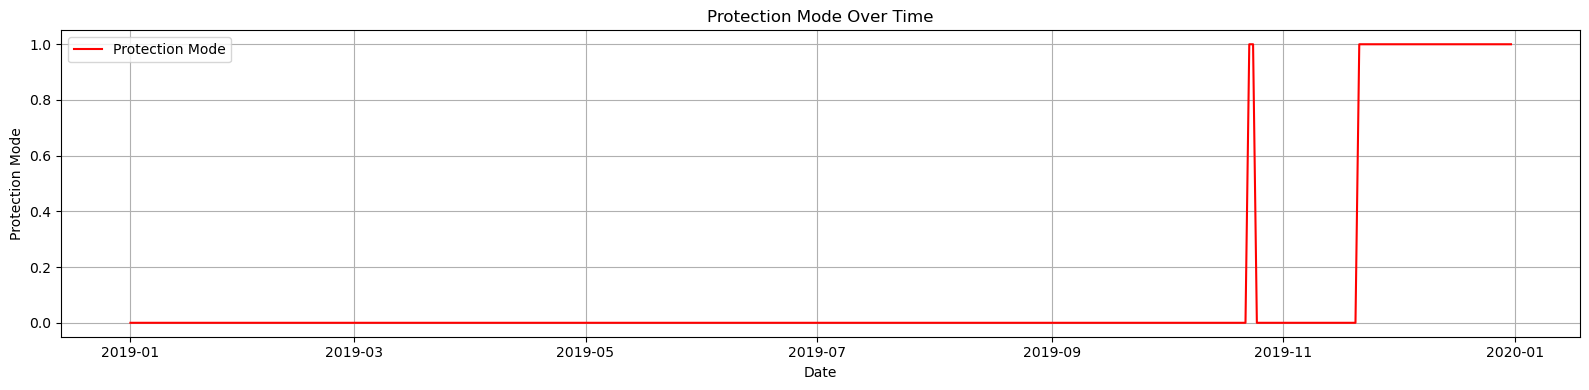

REPORT
--------------------------------
Date Range: 2019-01-01 00:00:00 - 2019-12-31 00:00:00
--------------------------------
Strategy Total Return: 195.13%
Buy and Hold Total Return: 188.12%
Strategy Improvement (%) : 3.73%
--------------------------------
Strategy Sharpe Ratio: 0.07
Buy and Hold Sharpe Ratio: 0.06
Strategy Improvement (%) : 8.86%
--------------------------------
Strategy Max Drawdown: 42.73%
Buy and Hold Max Drawdown: 48.82%
Strategy Improvement (%) : -12.46%
--------------------------------
# Buy Signals: 4
# Sell Signals: 5
# Hold Signals: 356
--------------------------------
Average Gap : 0.55 (0.32%)
Standard Deviation of Gap : 3.94 (1.96%)







Detecting Break Signals: 100%|██████████| 365/365 [00:00<00:00, 105711.98it/s]


Signal Generation Complete


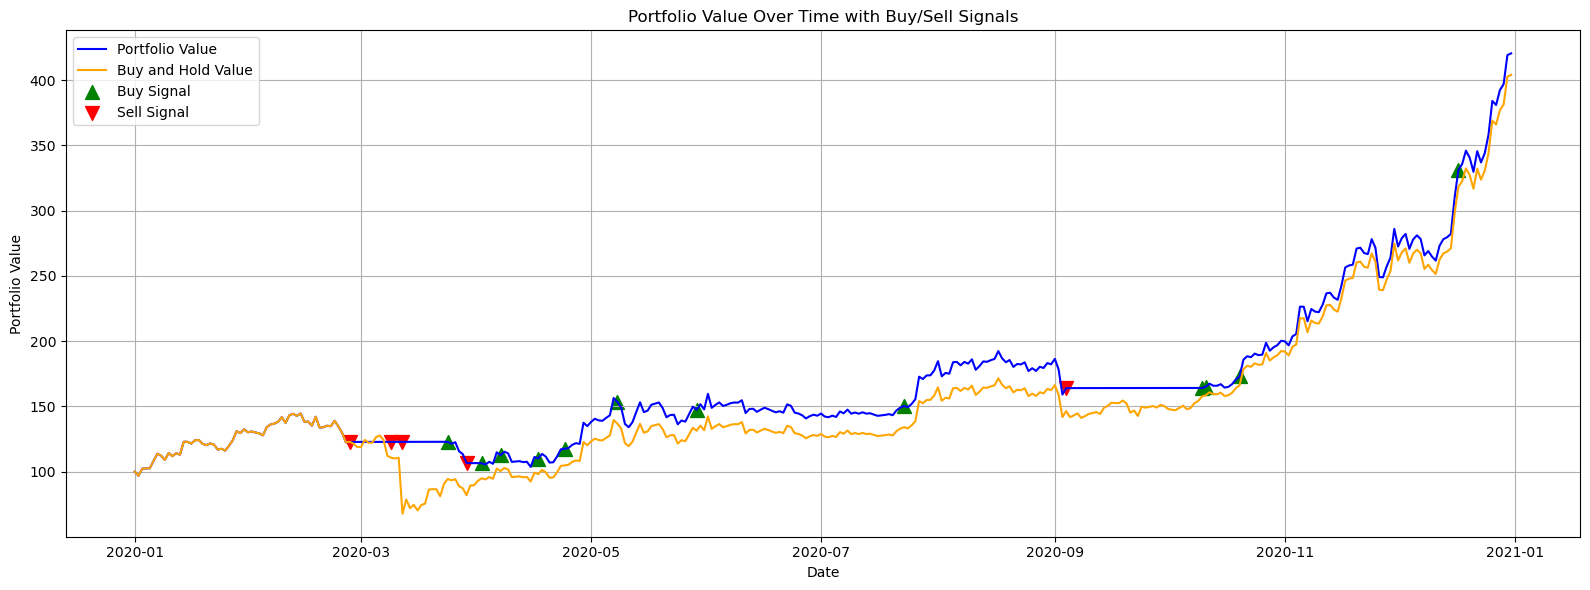

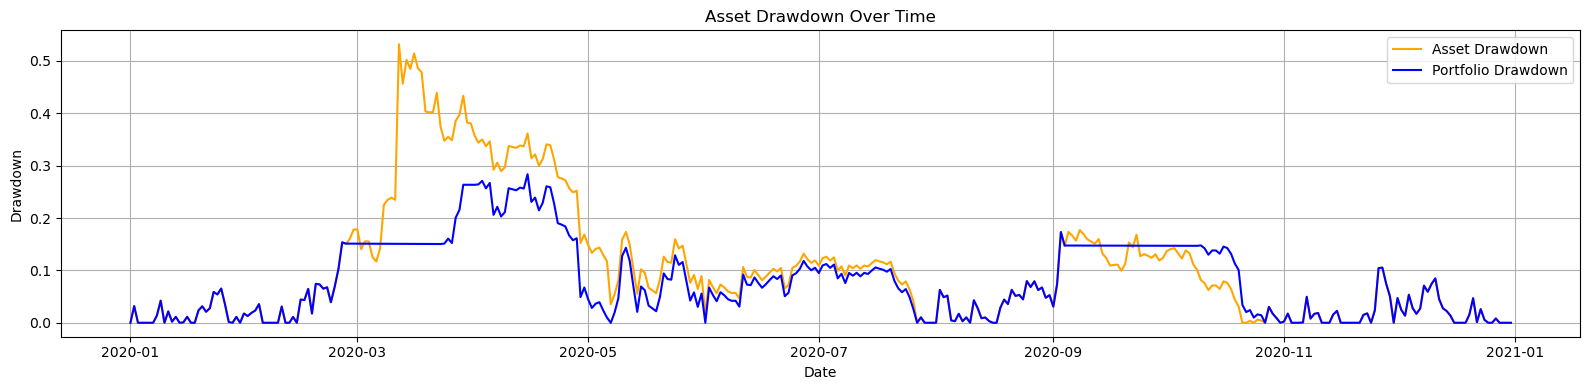

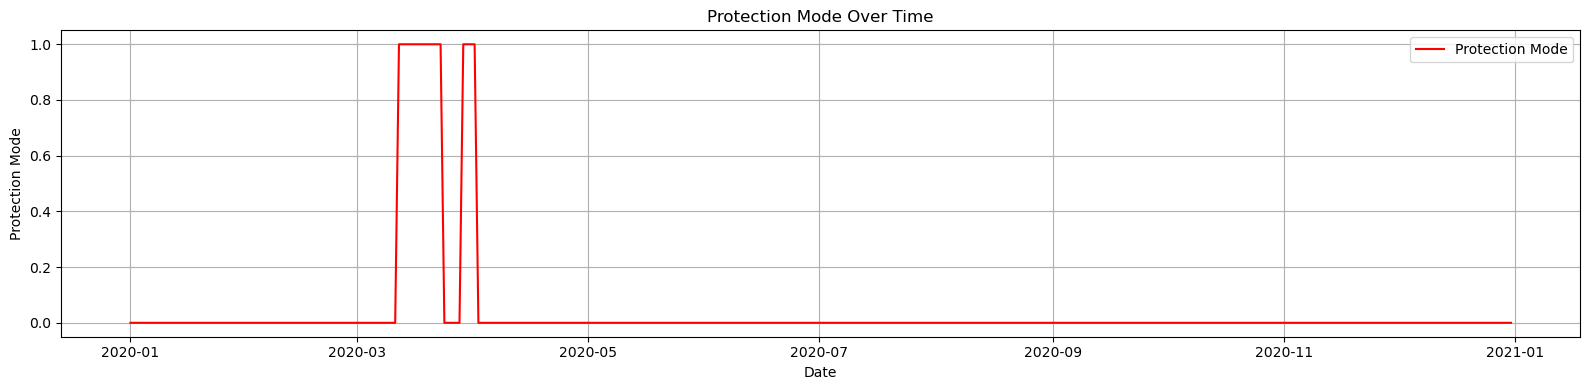

REPORT
--------------------------------
Date Range: 2020-01-01 00:00:00 - 2020-12-31 00:00:00
--------------------------------
Strategy Total Return: 420.58%
Buy and Hold Total Return: 404.08%
Strategy Improvement (%) : 4.08%
--------------------------------
Strategy Sharpe Ratio: 0.15
Buy and Hold Sharpe Ratio: 0.12
Strategy Improvement (%) : 27.08%
--------------------------------
Strategy Max Drawdown: 28.37%
Buy and Hold Max Drawdown: 53.17%
Strategy Improvement (%) : -46.65%
--------------------------------
# Buy Signals: 12
# Sell Signals: 5
# Hold Signals: 349
--------------------------------
Average Gap : 12.80 (9.78%)
Standard Deviation of Gap : 8.98 (10.81%)







Detecting Break Signals: 100%|██████████| 364/364 [00:00<00:00, 104057.16it/s]


Signal Generation Complete


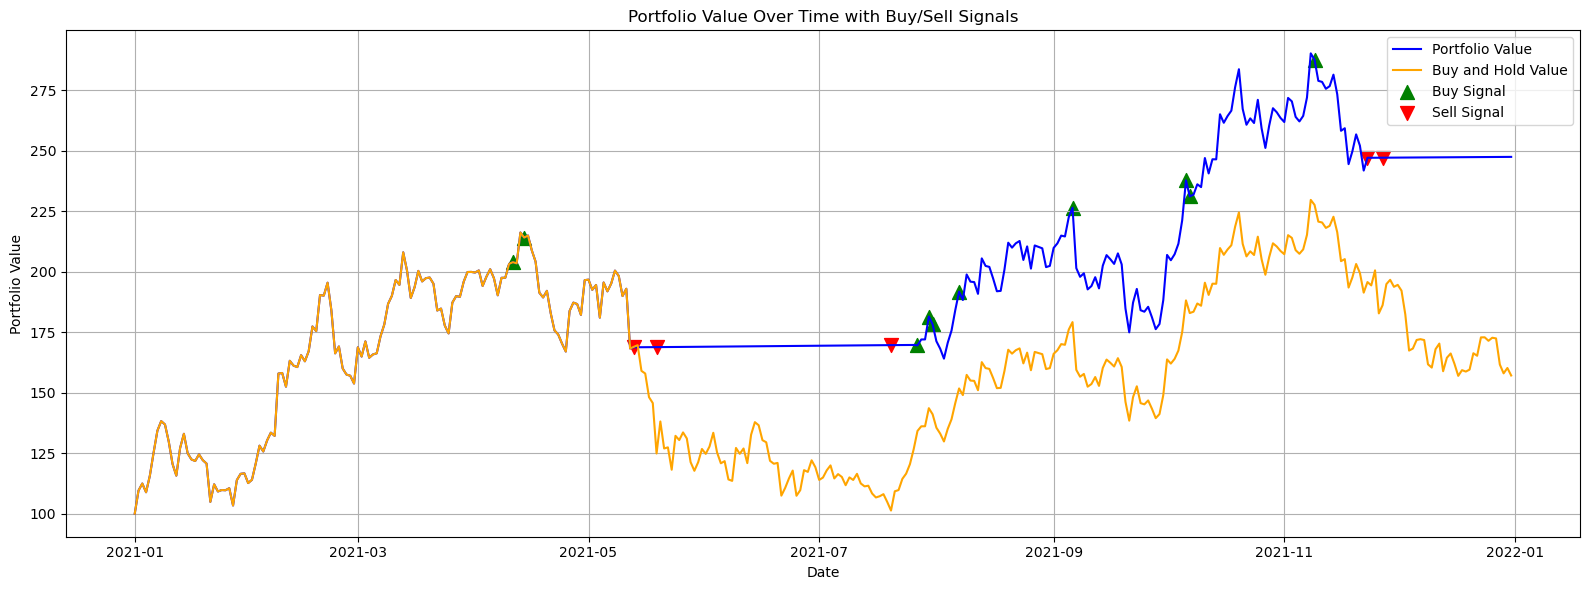

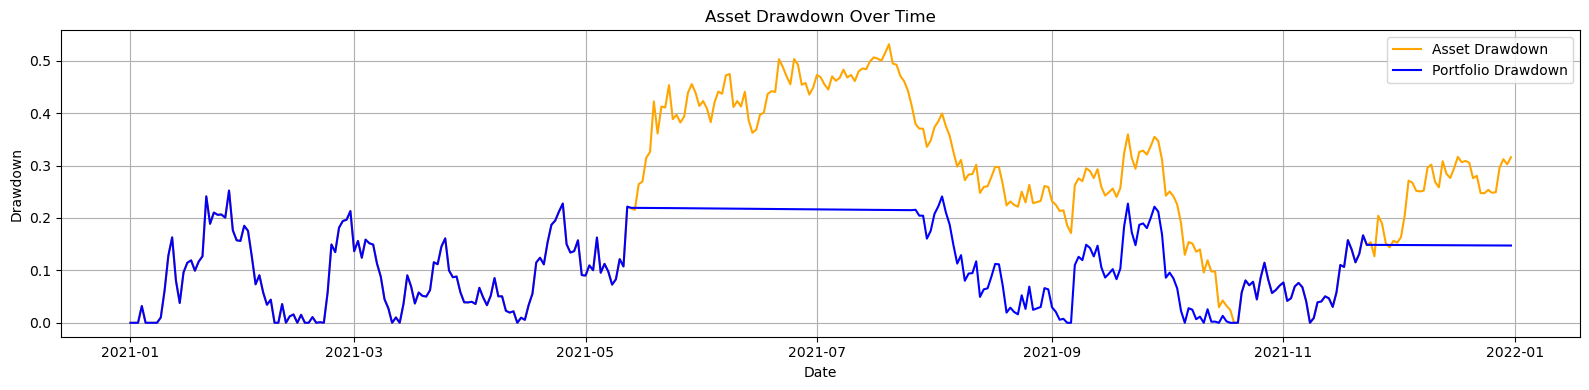

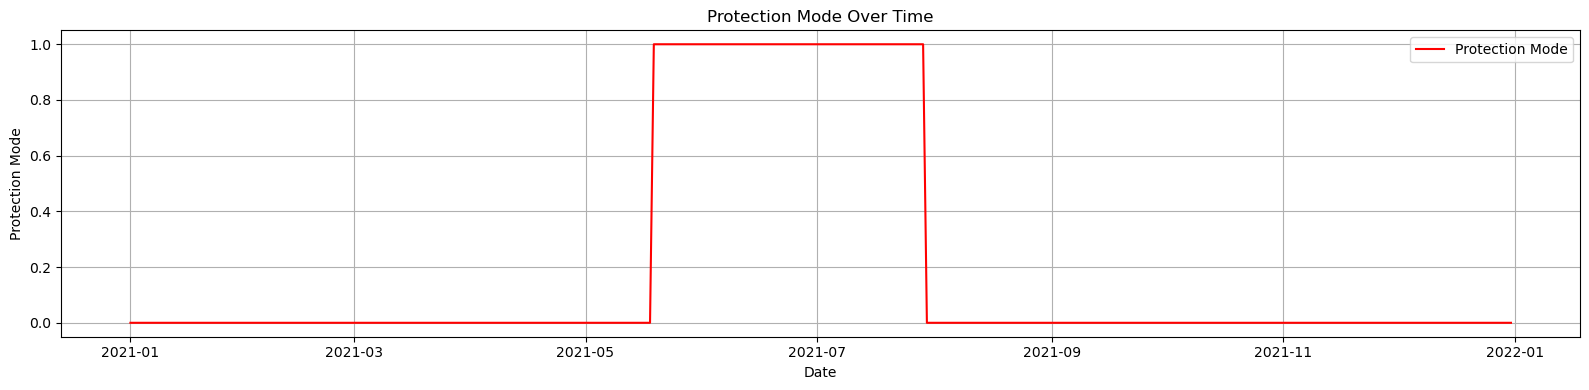

REPORT
--------------------------------
Date Range: 2021-01-01 00:00:00 - 2021-12-31 00:00:00
--------------------------------
Strategy Total Return: 248.64%
Buy and Hold Total Return: 157.78%
Strategy Improvement (%) : 57.58%
--------------------------------
Strategy Sharpe Ratio: 0.09
Buy and Hold Sharpe Ratio: 0.05
Strategy Improvement (%) : 78.54%
--------------------------------
Strategy Max Drawdown: 25.23%
Buy and Hold Max Drawdown: 53.14%
Strategy Improvement (%) : -52.53%
--------------------------------
# Buy Signals: 10
# Sell Signals: 5
# Hold Signals: 350
--------------------------------
Average Gap : 32.66 (21.41%)
Standard Deviation of Gap : 27.41 (18.65%)







Detecting Break Signals: 100%|██████████| 364/364 [00:00<00:00, 134620.11it/s]


Signal Generation Complete


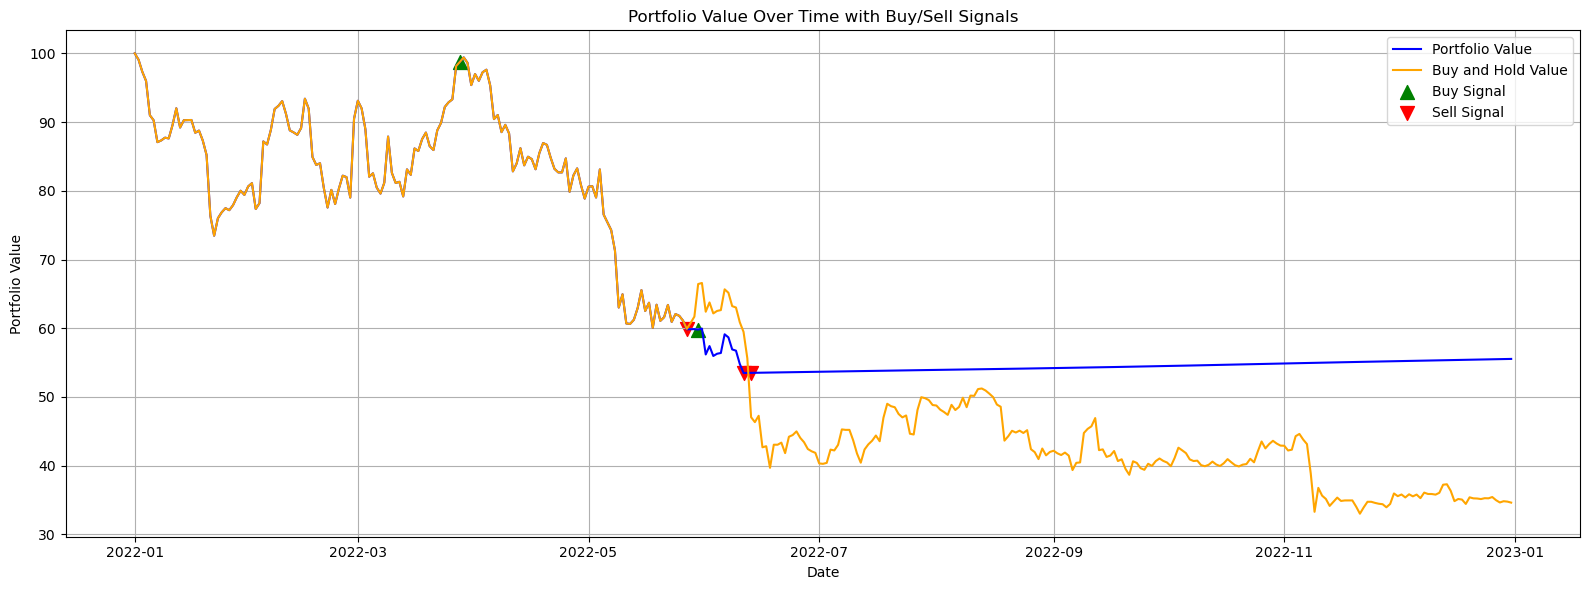

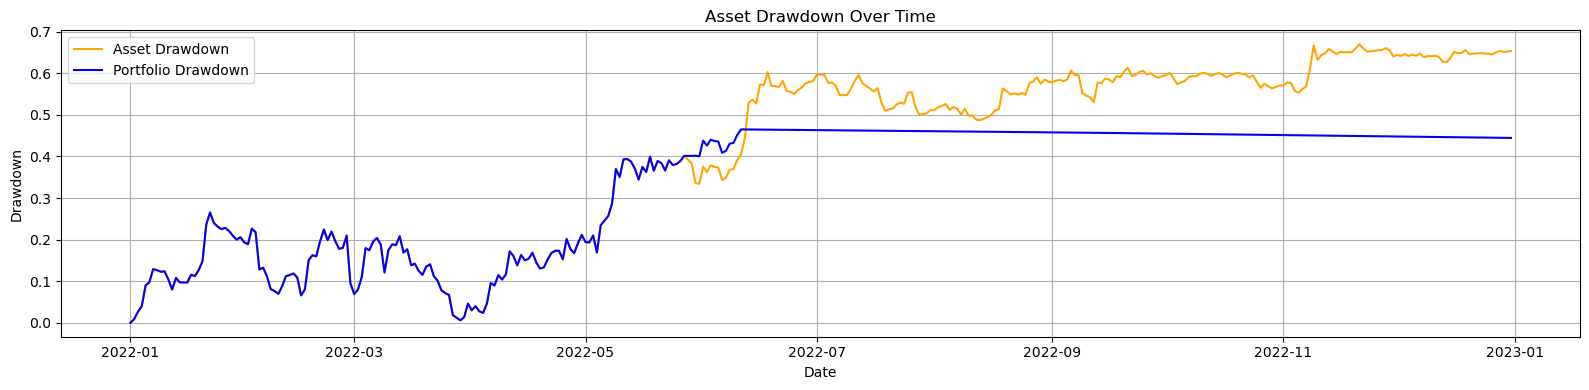

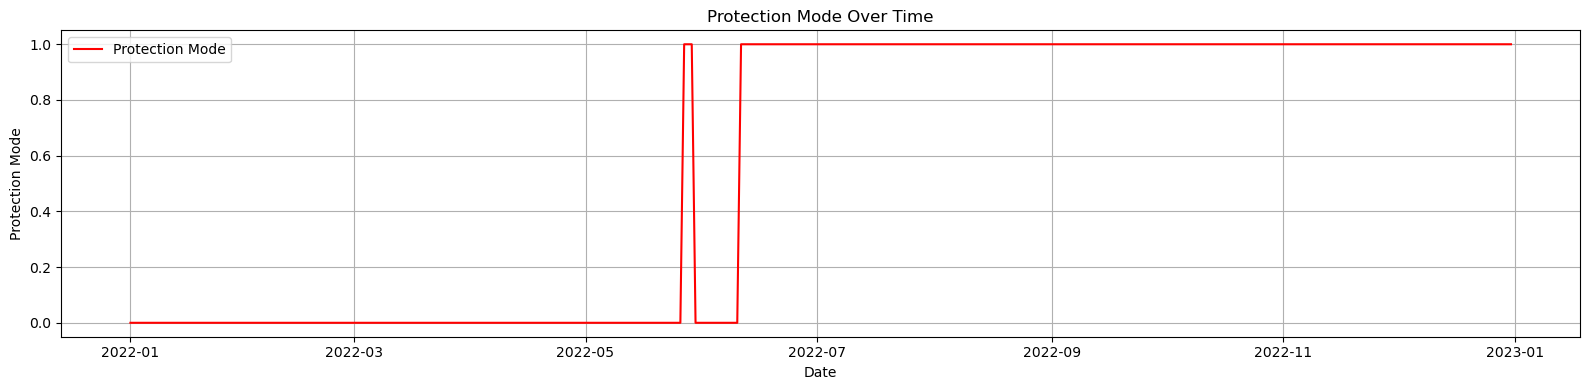

REPORT
--------------------------------
Date Range: 2022-01-01 00:00:00 - 2022-12-31 00:00:00
--------------------------------
Strategy Total Return: 55.73%
Buy and Hold Total Return: 34.74%
Strategy Improvement (%) : 60.41%
--------------------------------
Strategy Sharpe Ratio: -0.06
Buy and Hold Sharpe Ratio: -0.07
Strategy Improvement (%) : -12.54%
--------------------------------
Strategy Max Drawdown: 46.51%
Buy and Hold Max Drawdown: 66.98%
Strategy Improvement (%) : -30.57%
--------------------------------
# Buy Signals: 2
# Sell Signals: 3
# Hold Signals: 360
--------------------------------
Average Gap : 7.00 (18.12%)
Standard Deviation of Gap : 7.87 (21.07%)







Detecting Break Signals: 100%|██████████| 364/364 [00:00<00:00, 110440.30it/s]


Signal Generation Complete


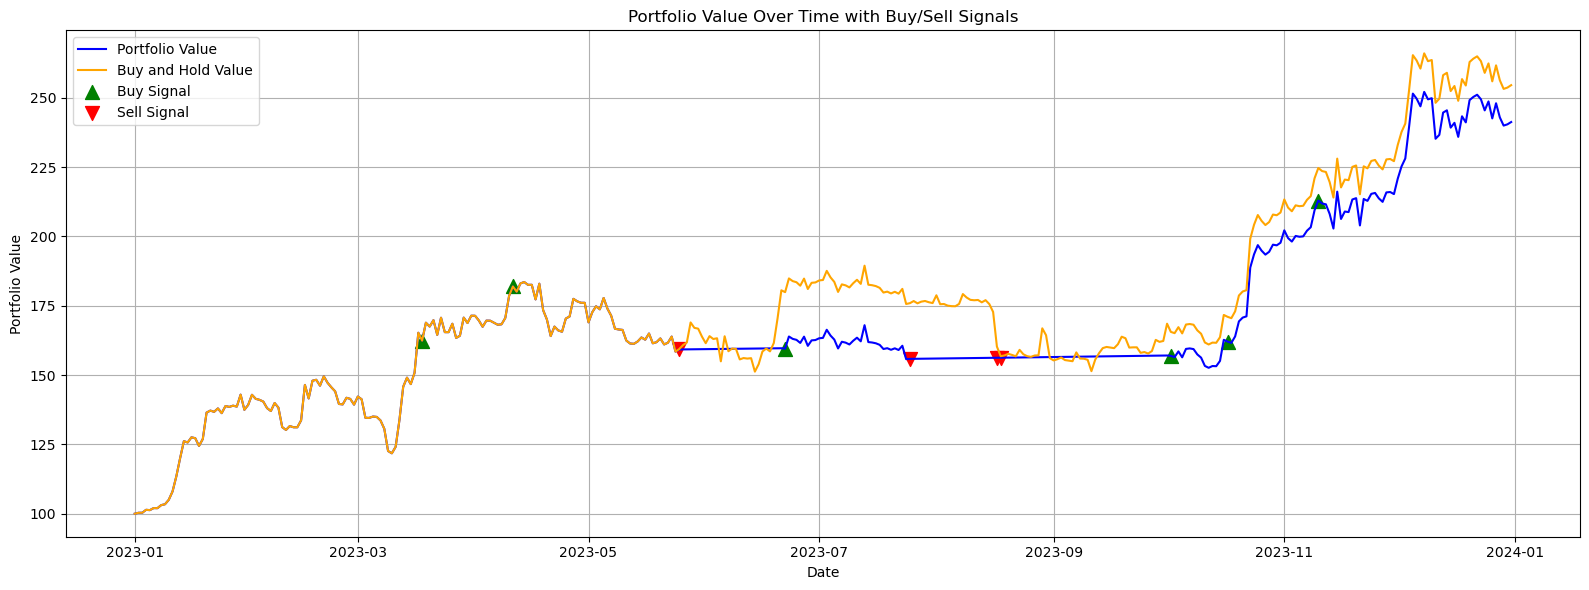

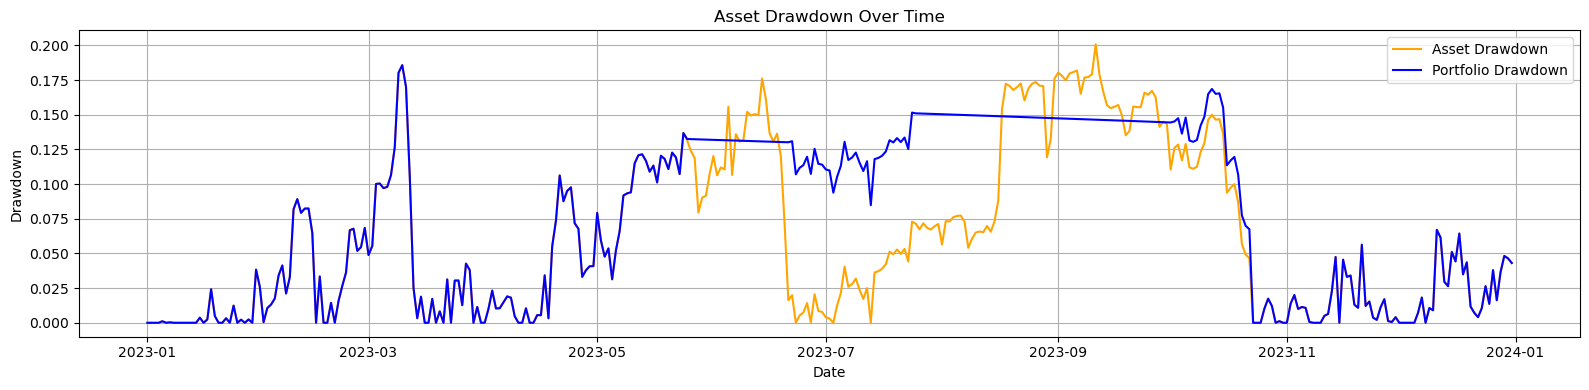

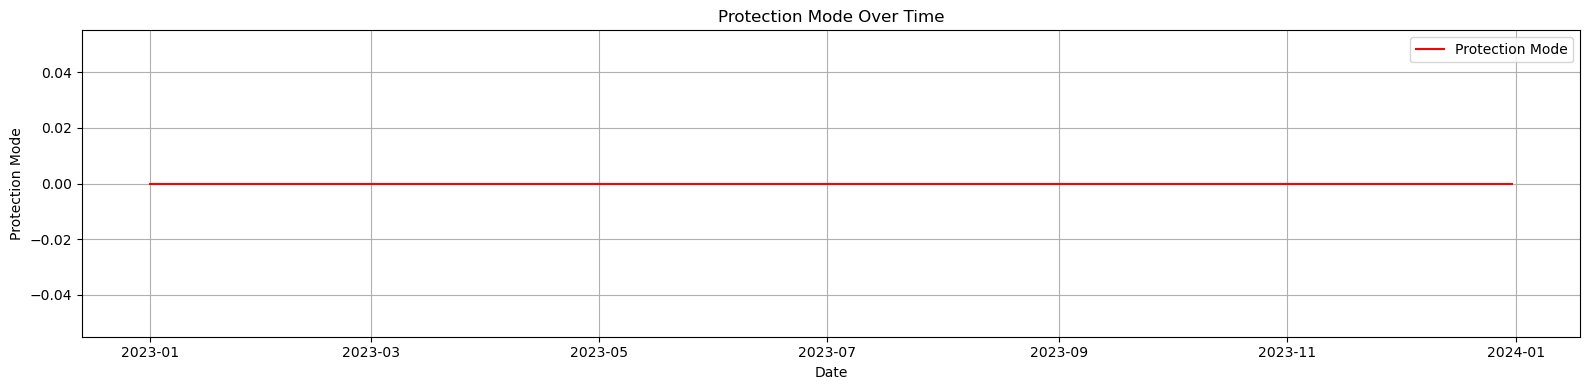

REPORT
--------------------------------
Date Range: 2023-01-01 00:00:00 - 2023-12-31 00:00:00
--------------------------------
Strategy Total Return: 242.42%
Buy and Hold Total Return: 255.80%
Strategy Improvement (%) : -5.23%
--------------------------------
Strategy Sharpe Ratio: 0.12
Buy and Hold Sharpe Ratio: 0.12
Strategy Improvement (%) : 3.82%
--------------------------------
Strategy Max Drawdown: 18.57%
Buy and Hold Max Drawdown: 20.08%
Strategy Improvement (%) : -7.50%
--------------------------------
# Buy Signals: 6
# Sell Signals: 4
# Hold Signals: 355
--------------------------------
Average Gap : -6.39 (-3.28%)
Standard Deviation of Gap : 7.88 (4.21%)







Detecting Break Signals: 100%|██████████| 365/365 [00:00<00:00, 134847.26it/s]


Signal Generation Complete


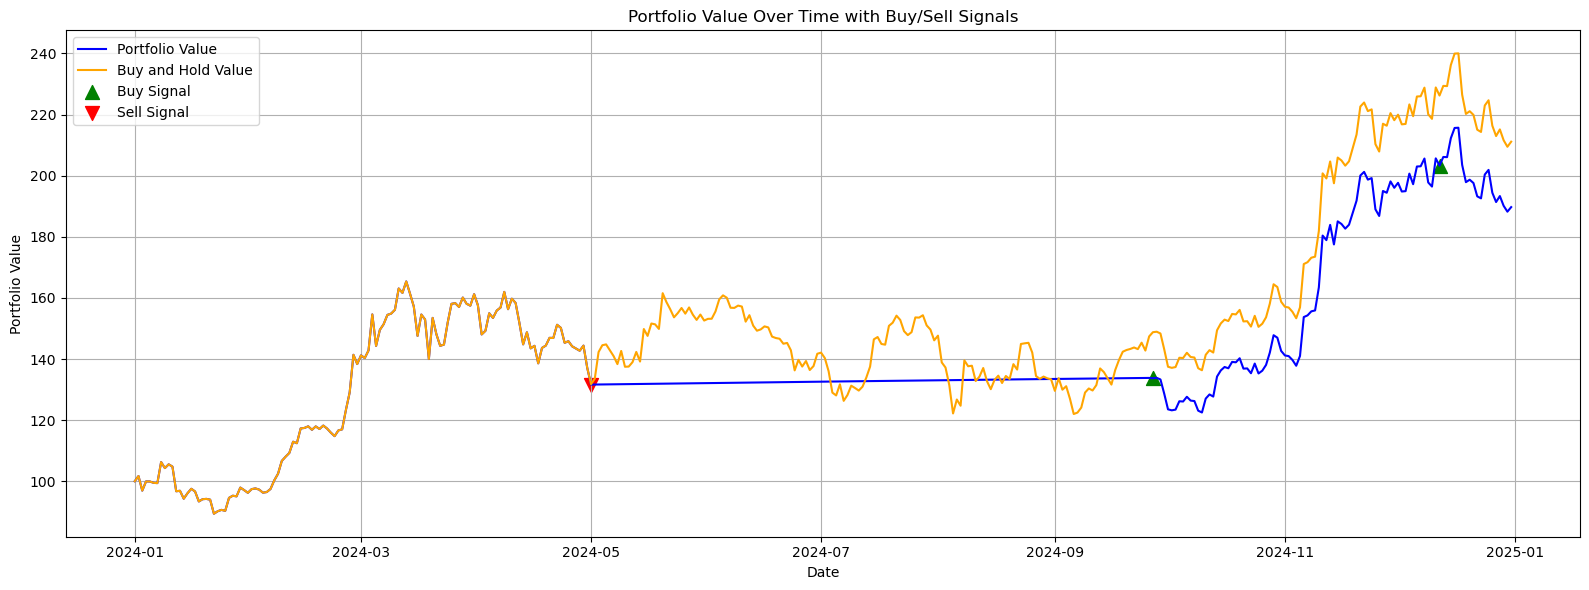

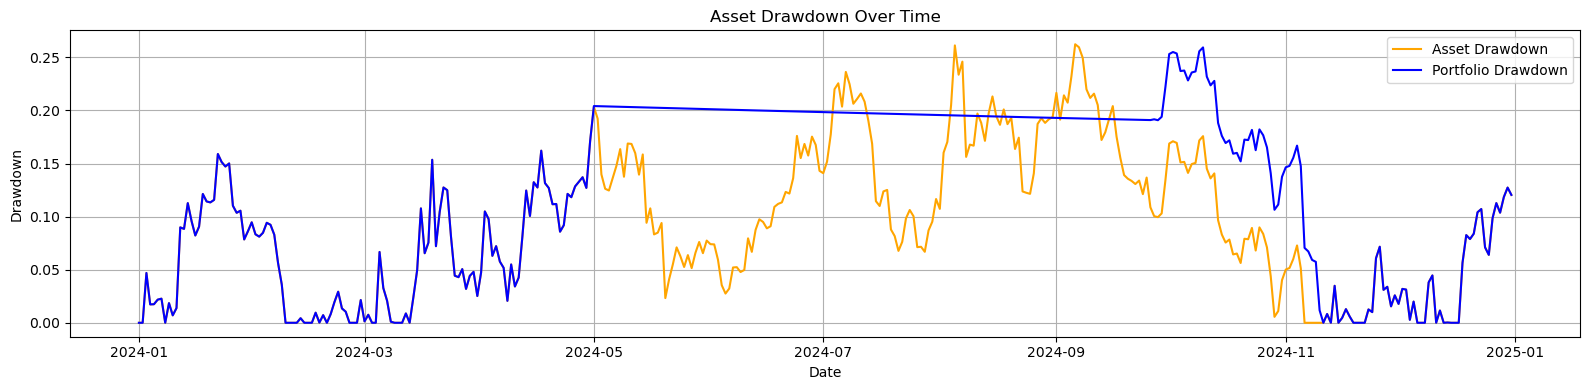

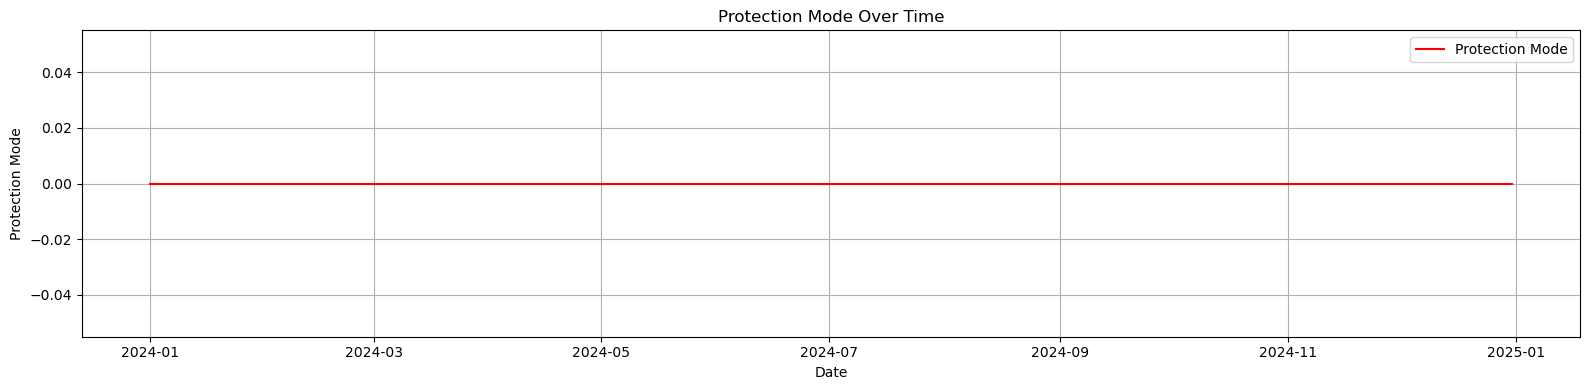

REPORT
--------------------------------
Date Range: 2024-01-01 00:00:00 - 2024-12-31 00:00:00
--------------------------------
Strategy Total Return: 189.70%
Buy and Hold Total Return: 211.11%
Strategy Improvement (%) : -10.14%
--------------------------------
Strategy Sharpe Ratio: 0.08
Buy and Hold Sharpe Ratio: 0.08
Strategy Improvement (%) : 1.94%
--------------------------------
Strategy Max Drawdown: 25.93%
Buy and Hold Max Drawdown: 26.23%
Strategy Improvement (%) : -1.13%
--------------------------------
# Buy Signals: 2
# Sell Signals: 1
# Hold Signals: 363
--------------------------------
Average Gap : -8.72 (-5.12%)
Standard Deviation of Gap : 9.83 (5.80%)







In [9]:
results ={}

for i in range(2, len(dates)-1):
    
    df = pd.read_csv('/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/Data/BTC.csv')
    df.dropna(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])

    year = dates[i]
    next_year = dates[i+1]
    df = df[(df['Date'] >= year) & (df['Date'] < next_year)]

    
    df.reset_index(inplace=True, drop=True)

    rf = df['Risk Free Rate']
    df = df.drop(columns=['Risk Free Rate'])

    params = pd.read_csv(f'/Users/hatim/Desktop/Applied Forecasting/Final Project/Algo Trading/FVG_Grid_Search/btc_train_results_{year.year}-{next_year.year}.csv')
    params = params.sort_values(by='Strategy Sharpe Ratio', ascending=False).iloc[0, :4]

    strategy = FVGStrategy(*params)
    signals_df = strategy.generate_signals(df)


    signals_df['Risk Free Rate'] = (1 + rf) ** (1/365) - 1

    signals_df

    result = simmulate(signals_df, 
                    initial_cash=0, btc_value=100, 
                    long_position=1, short_position=0, transaction_fee=0.001, 
                    max_drawdown_threshold=0.4, drawdown_buffer=0.05)

    # plot results
    plot_portfolio_with_signals(result)
    plot_drawdown(result)
    plot_protection_mode(result)

    # generate report
    results[year.year] = generate_report(result, verbose=False)
    generate_report(result, verbose=True)
    for i in range(5): print()



## Summary

In [10]:
summary = pd.DataFrame(results).T
summary.loc[2018, 'Strategy Sharpe Ratio Improvement']*=-1
summary.loc[2022, 'Strategy Sharpe Ratio Improvement']*=-1
summary


,Strategy Total Return,Buy and Hold Total Return,Strategy Total Return Improvement,Strategy Sharpe Ratio,Buy and Hold Sharpe Ratio,Strategy Sharpe Ratio Improvement,Strategy Max Drawdown,Buy and Hold Max Drawdown,Strategy Max Drawdown Improvement,Buy Signals,Sell Signals,Hold Signals,Average Gap between Portfolio and Buy and Hold Value,Standard Deviation of Gap between Portfolio and Buy and Hold Value
2018,0.598146,0.274724,117.726123,-0.066061,-0.061703,-7.063171,0.551921,0.813849,-32.183820,2.0,7.0,356.0,6.755523,12.081719
2019,1.951338,1.881193,3.728755,0.068852,0.063249,8.859006,0.427347,0.488172,-12.459859,4.0,5.0,356.0,0.551452,3.943530
2020,4.205822,4.040807,4.083736,0.149219,0.117424,27.077687,0.283665,0.531680,-46.647514,12.0,5.0,349.0,12.803946,8.982123
2021,2.486351,1.577804,57.582998,0.088230,0.049416,78.544401,0.252256,0.531420,-52.531756,10.0,5.0,350.0,32.660710,27.407165
2022,0.557281,0.347406,60.411975,-0.063396,-0.072486,12.539820,0.465061,0.669830,-30.570247,2.0,3.0,360.0,6.999084,7.866665
2023,2.424192,2.558049,-5.232768,0.122516,0.118007,3.820453,0.185747,0.200805,-7.498431,6.0,4.0,355.0,-6.386610,7.875805
2024,1.897043,2.111094,-10.139326,0.084752,0.083135,1.944376,0.259348,0.262323,-1.134122,2.0,1.0,363.0,-8.723159,9.825498


(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Max Drawdown Performance Comparison'}, xlabel='Year', ylabel='Performance (%)'>)

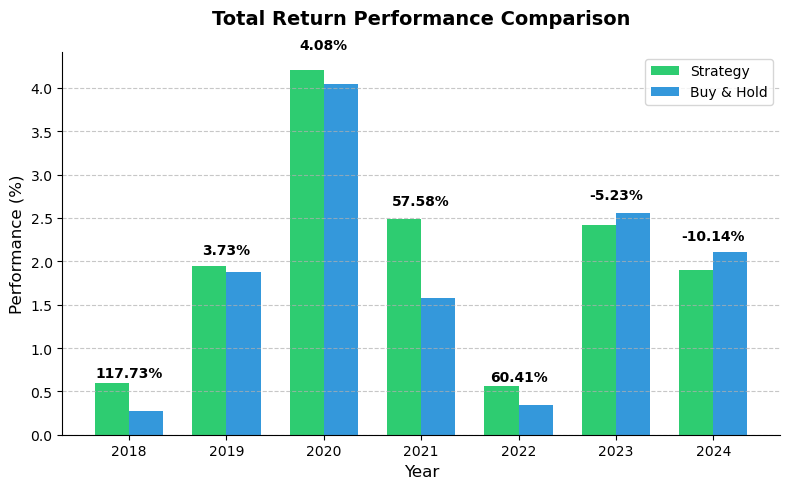

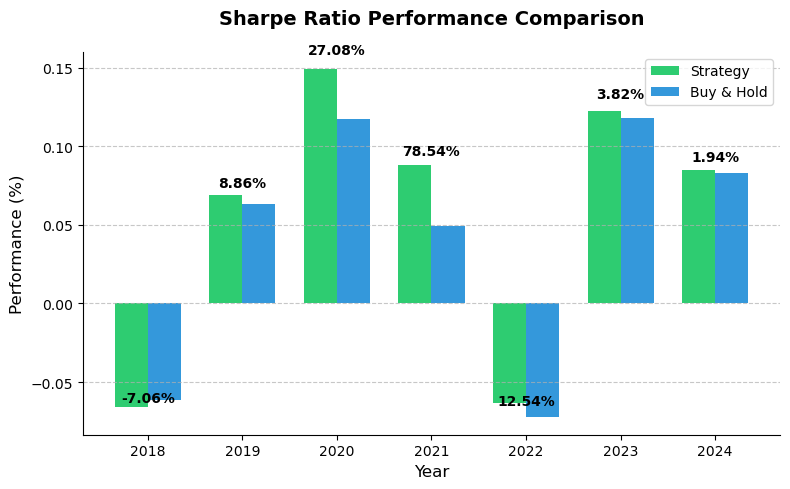

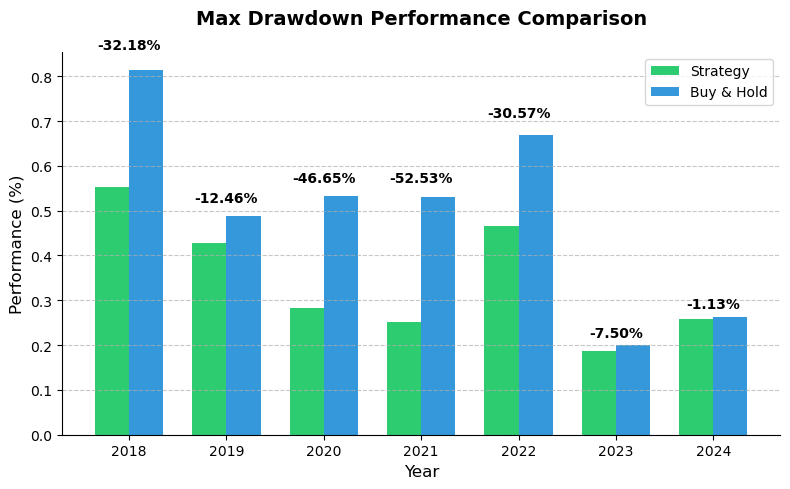

In [11]:
# plot returns 
import matplotlib.pyplot as plt
import numpy as np

def plot_performance_comparison(years, strategy_values, buy_hold_values, improvements, title):
    """
    Plot a bar graph comparing strategy performance with buy-and-hold over time, including improvement text.
    
    Parameters:
    -----------
    years : list
        List of years for x-axis
    strategy_values : list
        List of strategy performance values for each year
    buy_hold_values : list
        List of buy-and-hold performance values for each year
    improvements : list
        List of improvement percentages for each year
    title : str
        The title of the plot
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Set up the bars
    x = np.arange(len(years))  # the label locations
    width = 0.35  # the width of the bars
    
    # Create bars
    ax.bar(x - width/2, strategy_values, width, label='Strategy', color='#2ecc71')
    ax.bar(x + width/2, buy_hold_values, width, label='Buy & Hold', color='#3498db')
    
    # Add improvement text above the bars
    for i, (strategy, buyhold, improvement) in enumerate(zip(strategy_values, buy_hold_values, improvements)):
        max_value = max(strategy, buyhold)
        ax.text(i, max_value * 1.05, f'{improvement:.2f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Customize the plot
    ax.set_title(title, pad=20, fontsize=14, fontweight='bold')
    ax.set_ylabel('Performance (%)', fontsize=12)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    

    # Add legend
    ax.legend()
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add grid lines
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, ax


# now create a simple plot with 2 stacks for average gap
def plot_average_gap(summary):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set up the bars
    x = np.arange(len(summary.index))  # the label locations
    width = 0.35  # the width of the bars
    
    # Create bars
    ax.bar(x - width/2, summary['Average Gap between Portfolio and Buy and Hold Value'], 
                      width, label='Average Gap', color='#2ecc71')
    ax.bar(x + width/2, summary['Standard Deviation of Gap between Portfolio and Buy and Hold Value'], 
                      width, label='Standard Deviation of Gap', color='#3498db')
    
    # Customize the plot
    ax.set_title('Average Gap Performance Comparison', pad=20, fontsize=14, fontweight='bold')
    ax.set_ylabel('Value (%)', fontsize=12)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(summary.index)
    
    # Add legend
    ax.legend()
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add grid lines
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, ax



plot_performance_comparison(summary.index,summary['Strategy Total Return'], summary['Buy and Hold Total Return'], summary['Strategy Total Return Improvement'], "Total Return Performance Comparison")


plot_performance_comparison(summary.index,summary['Strategy Sharpe Ratio'], summary['Buy and Hold Sharpe Ratio'], summary['Strategy Sharpe Ratio Improvement'], "Sharpe Ratio Performance Comparison")

plot_performance_comparison(summary.index,summary['Strategy Max Drawdown'], summary['Buy and Hold Max Drawdown'], summary['Strategy Max Drawdown Improvement'], "Max Drawdown Performance Comparison")

In [15]:
print(summary[['Strategy Total Return Improvement', 'Strategy Sharpe Ratio Improvement', 'Strategy Max Drawdown Improvement']].mean().to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
Strategy Total Return Improvement & 32.594499 \\
Strategy Sharpe Ratio Improvement & 17.960368 \\
Strategy Max Drawdown Improvement & -26.146536 \\
\bottomrule
\end{tabular}

